In [39]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

In [40]:
# Importing neccesary packages

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('ggplot') # default plot style.

from scipy import stats
from scipy.stats import norm


from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

import math
import warnings
warnings.filterwarnings('ignore')

In [41]:
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [42]:
data["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [43]:
#PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

In [44]:
data.drop(columns="CLIENTNUM",inplace=True)

In [45]:
features = data.drop(columns="Attrition_Flag")
target = data.Attrition_Flag

In [46]:
features.head(3)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


# EDA

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [48]:
categorical = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [49]:
numerical = [col for col in features.columns if col not in categorical]

In [50]:
numerical

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12, 9)

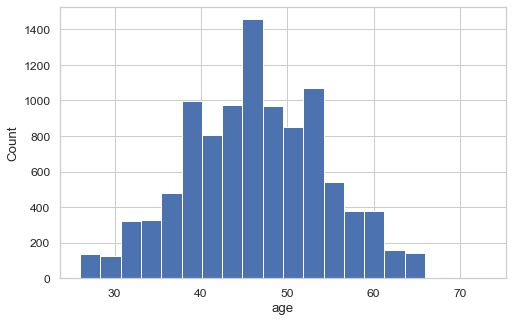

In [52]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['Customer_Age'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='age', ylabel='Count');

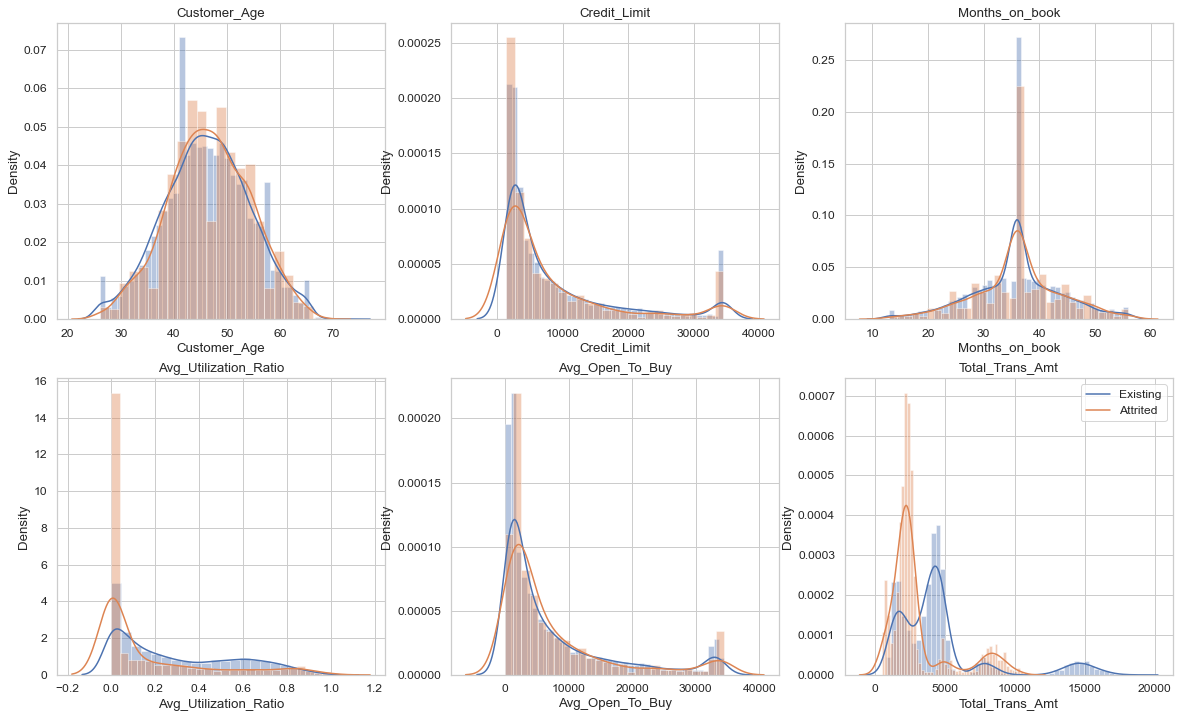

In [53]:
cols = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']

fig,ax = plt.subplots(len(cols)//3, 3, figsize=(20,12))
index = 0

data0 = data[data["Attrition_Flag"]=="Existing Customer"]
data1 = data[data["Attrition_Flag"]=='Attrited Customer']

for i in range(2):
    for j in range(3):
        sns.distplot(data0.loc[:,cols[index]],hist=True,kde=True,ax=ax[i][j])
        sns.distplot(data1.loc[:,cols[index]],hist=True,kde=True,ax=ax[i][j])
        ax[i][j].set_title(cols[index])
        index += 1
        plt.legend(labels=["Existing","Attrited"])

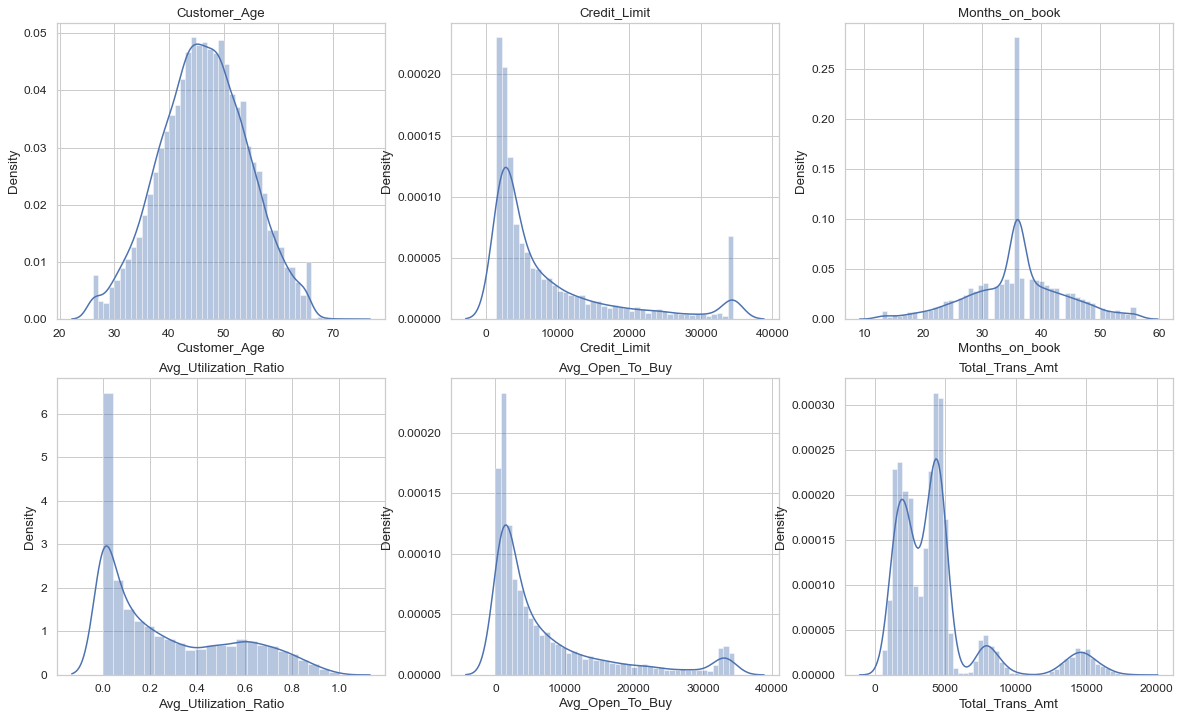

In [54]:
cols = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']

fig,ax = plt.subplots(len(cols)//3, 3, figsize=(20,12))
index = 0

for i in range(2):
    for j in range(3):
        sns.distplot(data.loc[:,cols[index]],hist=True,kde=True,ax=ax[i][j])
        ax[i][j].set_title(cols[index])
        index += 1

📊distplot : 가우시안 정규분포의 형태 가운데에 밀집된 모양이 가장 의미있음. 중간에 봉우리처럼 튀어 나온 부분이 있으면 그 부분에 집중하여 분석해보자~! 작은 봉우리들을 관측해야한다는 합리적 의심 ㄱㄴ

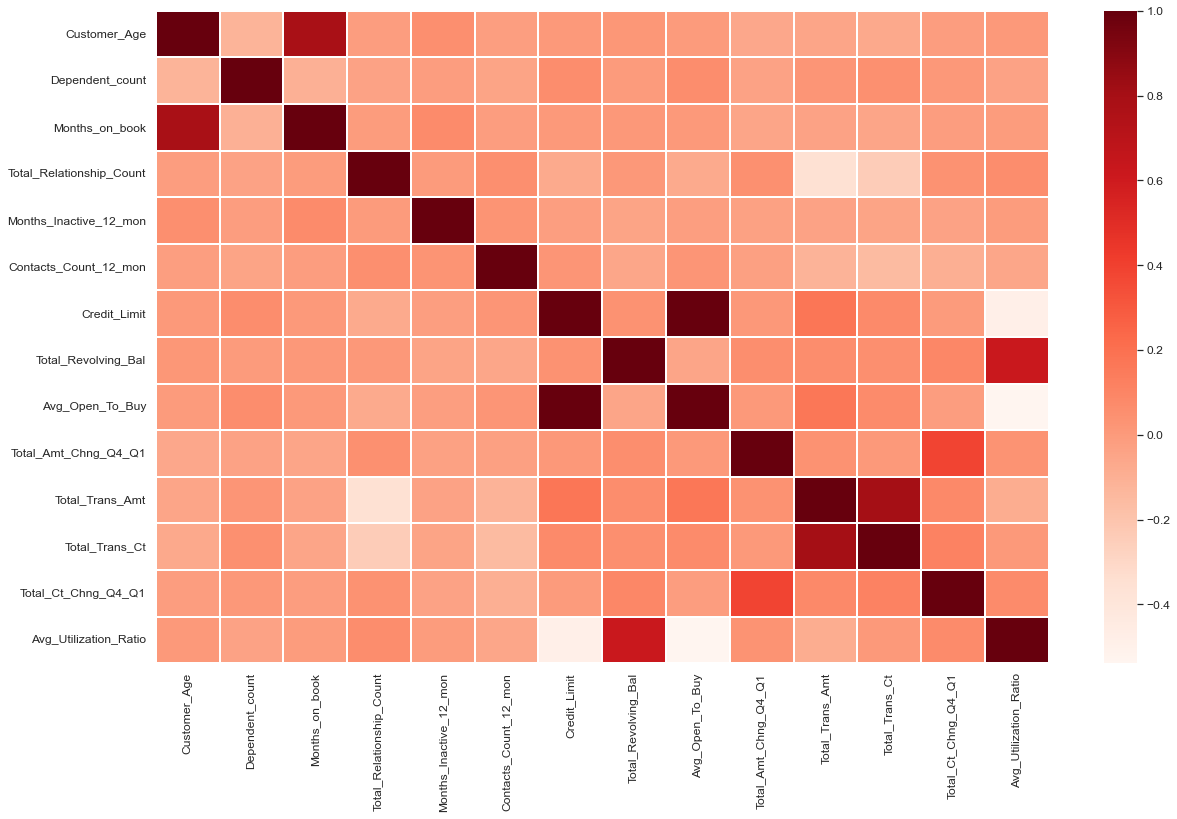

In [55]:
corr = data.loc[:,numerical].corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

➡️상관관계는 Linearg한 관계만 확인할 수 있는 것, quadratic or n-degree polynomial한 관계는 알 수 없다

array([[<AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>],
       [<AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Amt'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>]],
      dtype=object)

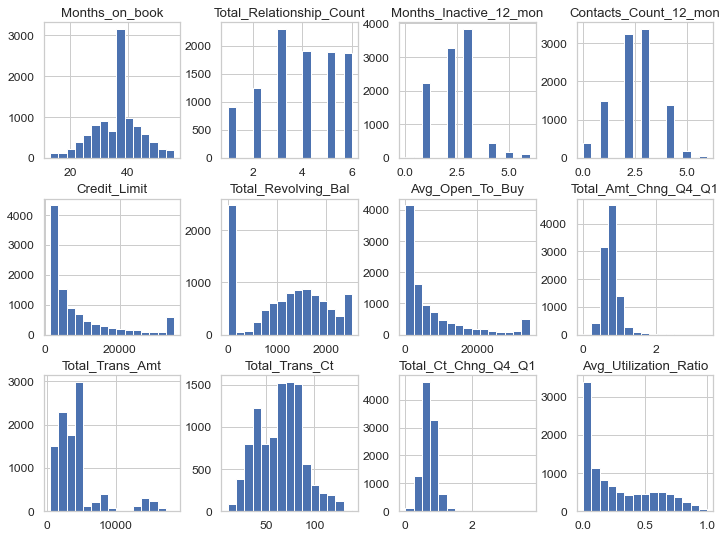

In [56]:
data[numerical[2:]].hist(bins=15, figsize=(12,9), layout=(3,4))

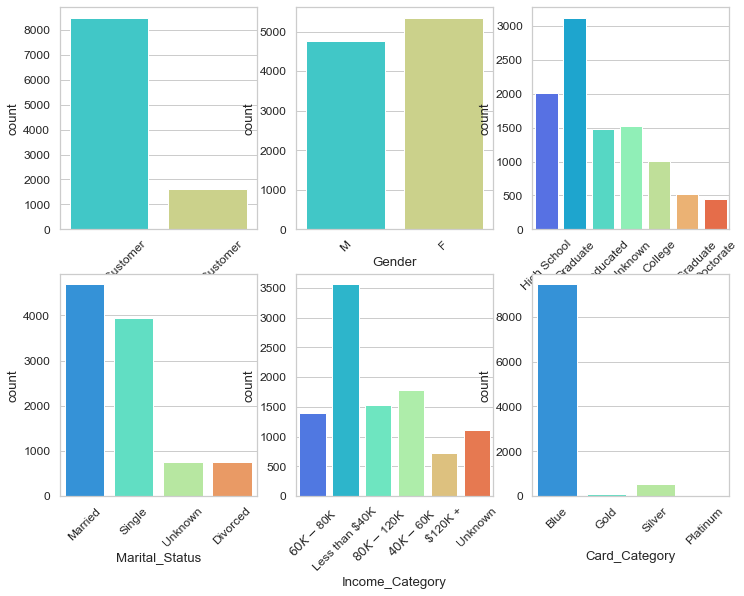

In [57]:
plt.figure(figsize=(12,9))
for idx, feature in enumerate(categorical):
    plt.subplot(2,3,idx+1)
    sns.countplot(x=feature,data=data, palette='rainbow')
    plt.xticks(rotation=45)

- 남여비율 비슷
- 졸업생 > 고등학생 > null > 교육x
- 기혼 > 미혼 
- 40000이하 > 40k~60/ 60~80 / 80~120(범위가 다르다잉) 유사

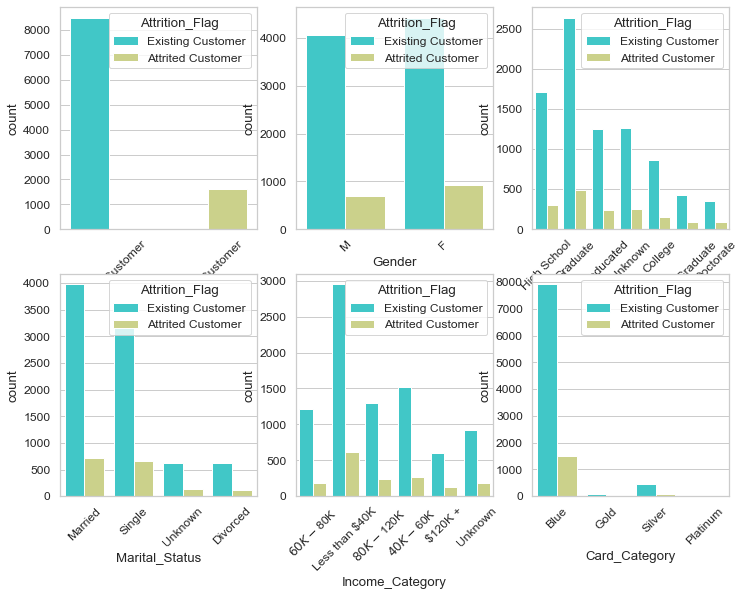

In [58]:
#데이터 불균형이 있을 때 EDA시 countplot주의하기
fig, ax = plt.subplots(2,3,figsize=(12,9))
for var, subplot in zip(categorical, ax.flatten()):
    g = sns.countplot(var,hue= 'Attrition_Flag',data=data,palette='rainbow',ax=subplot)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)

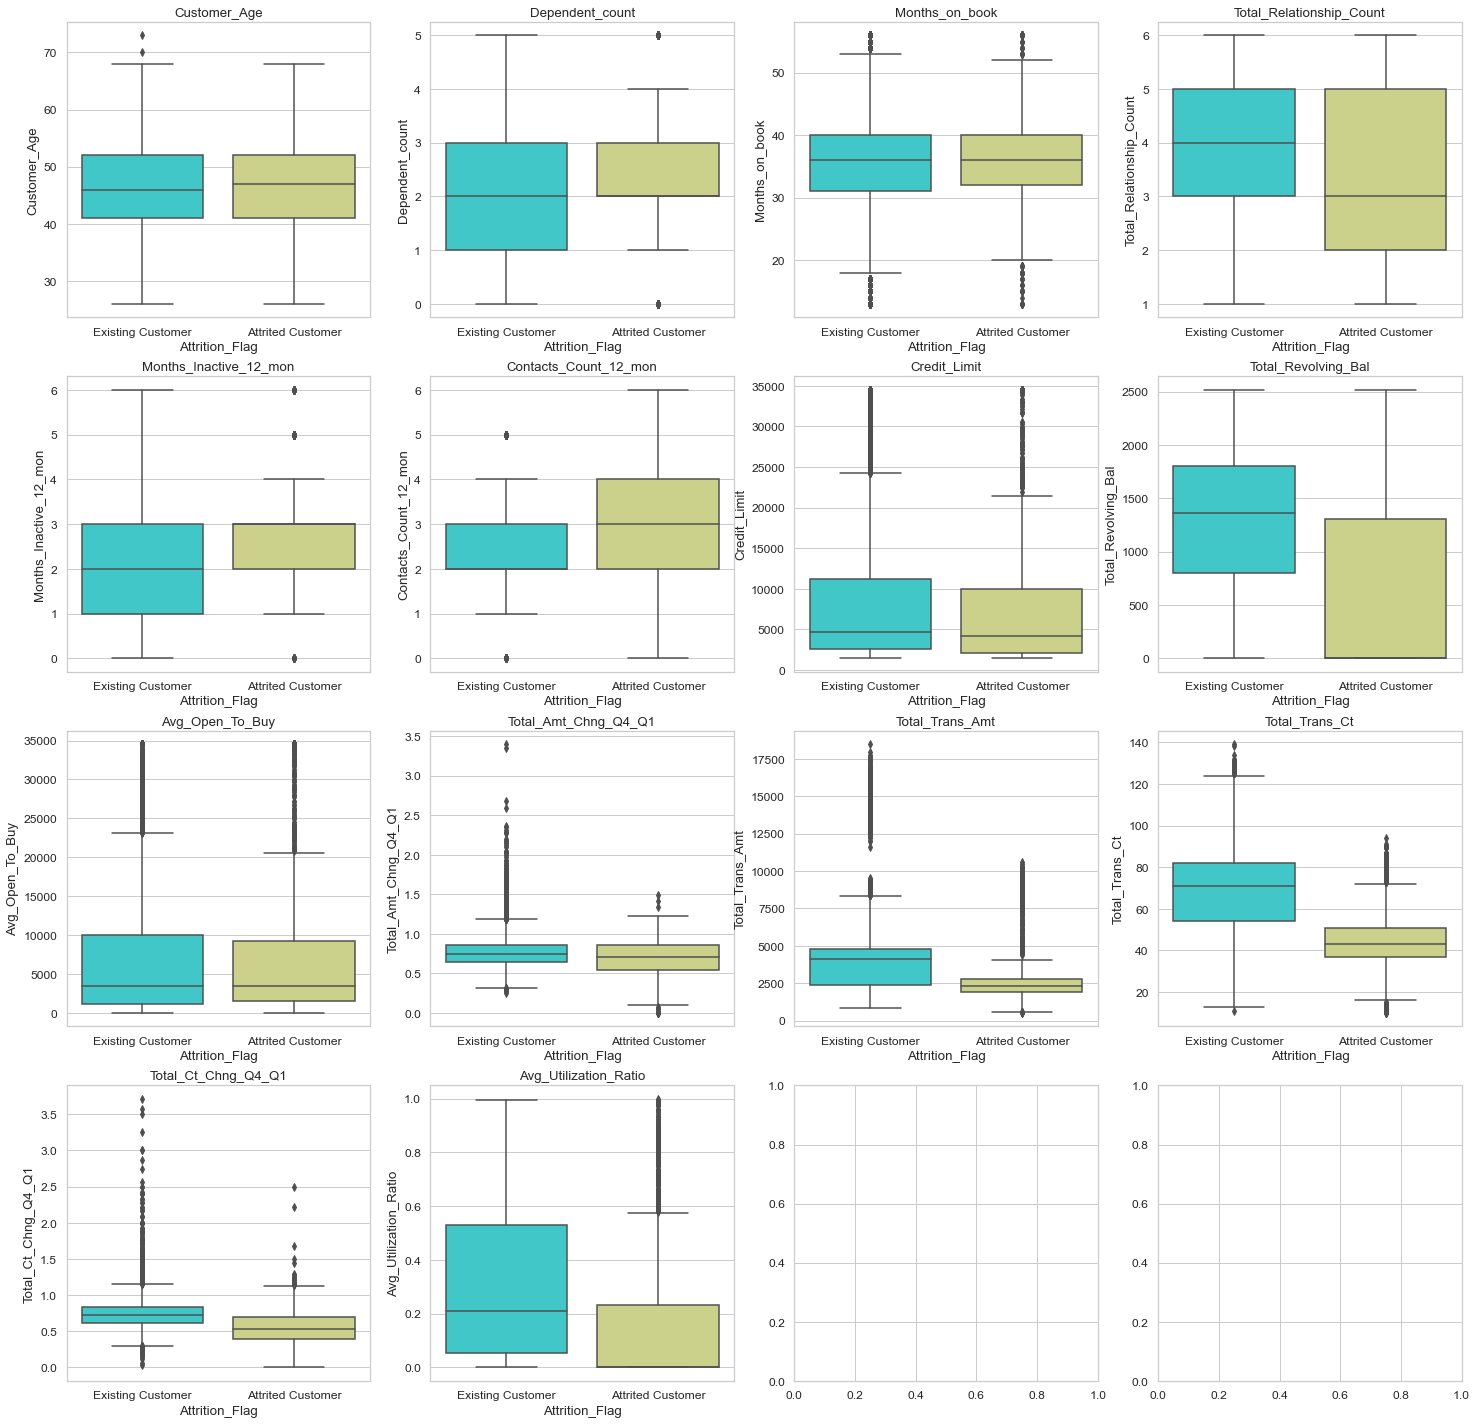

In [59]:
fig, ax = plt.subplots(4,4,figsize=(25,25))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x = 'Attrition_Flag', y = var, data=data, ax=subplot, palette="rainbow").set_title(var)

In [60]:
data.groupby(['Gender','Attrition_Flag'])["Attrition_Flag"].count()

Gender  Attrition_Flag   
F       Attrited Customer     930
        Existing Customer    4428
M       Attrited Customer     697
        Existing Customer    4072
Name: Attrition_Flag, dtype: int64

# feature engineering

In [61]:
updated_df = pd.DataFrame()

def tobinary():
    
    updated_df['Attrition'] = data.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
    
    updated_df['Gender'] = data.Gender.map({'M':1, 'F':0})

In [62]:
def stringtoint():
    income_data = data['Income_Category'].replace({'Unknown': 0 , 'Less than $40K':1, '$40K - $60K':2, 
                                                      '$80K - $120K':3, '$60K - $80K':4, '$120K +':5})
    
    education_data = data['Education_Level'].replace({'Unknown': 0, 'Uneducated':1,'High School':2, 'Graduate':3, 
                                                         'College':4,'Post-Graduate':5,'Doctorate':6})
    
    card_data = data['Card_Category'].replace({'Blue':1, 'Silver':2, 'Gold':3, 'Platinum' :4})

    updated_df['Income_Category'] = income_data
    updated_df['Education_Level'] = education_data
    updated_df['Card_Category'] = card_data

In [63]:
def encode():
    global updated_df
    marital_dummies = pd.get_dummies(data['Marital_Status'], prefix='Marital')
    updated_df = pd.concat([updated_df, marital_dummies], axis=1)
    updated_df = updated_df.drop('Marital_Unknown',axis=1) #dummy변수 한개 제거

In [64]:
def concat_with_numerics():
    global updated_df
    updated_df = pd.concat([updated_df, data.loc[:, numerical]], axis=1)

In [65]:
tobinary()
stringtoint()
encode()
concat_with_numerics()

In [66]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Income_Category           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Card_Category             10127 non-null  int64  
 5   Marital_Divorced          10127 non-null  uint8  
 6   Marital_Married           10127 non-null  uint8  
 7   Marital_Single            10127 non-null  uint8  
 8   Customer_Age              10127 non-null  int64  
 9   Dependent_count           10127 non-null  int64  
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

# Modeling

In [67]:
updated_df.head(5)

,Attrition,Gender,Income_Category,Education_Level,Card_Category,Marital_Divorced,Marital_Married,Marital_Single,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,4,2,1,0,1,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,0,1,3,1,0,0,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,1,3,3,1,0,1,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,0,1,2,1,0,0,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,1,4,1,1,0,1,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [68]:
updated_df.describe()

,Attrition,Gender,Income_Category,Education_Level,Card_Category,Marital_Divorced,Marital_Married,Marital_Single,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.470919,2.072578,2.393108,1.083638,0.073862,0.462822,0.389355,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,0.499178,1.461929,1.572466,0.333784,0.261559,0.498641,0.487628,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,1.000000,5.000000,6.000000,4.000000,1.000000,1.000000,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


- xgboost
- lightgbm
- logistic regression
- randomforest
- svm
- gaussian
- mlp classifier

-> cross-validation방법으로 훈련!!

In [69]:
# Importing packages for modelling.

import xgboost as xgb
import lightgbm as lgb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve, train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MaxAbsScaler

In [70]:
X = updated_df.drop('Attrition', axis=1)
y = updated_df['Attrition']

In [71]:
maxAbsScaler = MaxAbsScaler()
print(maxAbsScaler.fit(X))
train_data_maxAbsScaled = maxAbsScaler.transform(X)

MaxAbsScaler()


In [72]:
X_train, X_test, y_train, y_test = train_test_split(train_data_maxAbsScaled, y, test_size=0.3, random_state=42)

In [73]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(X_train, y_train)
prediction = logreg.predict(X_test) 
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.49      0.61       496
           1       0.91      0.98      0.94      2543

    accuracy                           0.90      3039
   macro avg       0.86      0.74      0.78      3039
weighted avg       0.89      0.90      0.89      3039



## 1. oversampling vs cost-sensitive learning

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.3, random_state=42)

In [75]:
#cost-sesitive learning
rfs_balanced_model = RandomForestClassifier(criterion='gini', n_estimators=200,
                            max_depth=5, random_state=42, class_weight="balanced")
rfs_balanced_model.fit(X_train,y_train)
prediction = rfs_balanced_model.predict(X_val)
print(classification_report(y_val, prediction))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       350
           1       0.97      0.92      0.94      1777

    accuracy                           0.91      2127
   macro avg       0.82      0.88      0.85      2127
weighted avg       0.92      0.91      0.91      2127



In [76]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Attrition'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Attrition']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Attrition']==1]))
print("Proportion of existed customer data in oversampled data is ",len(os_data_y[os_data_y['Attrition']==0])/len(os_data_X))
print("Proportion of attrition customer data in oversampled data is ",len(os_data_y[os_data_y['Attrition']==1])/len(os_data_X))

length of oversampled data is  8360
Number of no subscription in oversampled data 4180
Number of subscription 4180
Proportion of existed customer data in oversampled data is  0.5
Proportion of attrition customer data in oversampled data is  0.5


In [77]:
rfs_model_with_smote = RandomForestClassifier(criterion='gini', n_estimators=200,
                            max_depth=5, random_state=42)
rfs_model_with_smote.fit(os_data_X,os_data_y)
prediction = rfs_balanced_model.predict(X_val)
print(classification_report(y_val, prediction))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       350
           1       0.97      0.92      0.94      1777

    accuracy                           0.91      2127
   macro avg       0.82      0.88      0.85      2127
weighted avg       0.92      0.91      0.91      2127



## 🚀 2. supervised learning

In [78]:
X_train, X_test, y_train, y_test = train_test_split(train_data_maxAbsScaled, y, test_size=0.3, random_state=42)

In [79]:
os = SMOTE(random_state=0)
columns = X.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Attrition'])

In [80]:
def estimates(X_data, y_data,models, cv):
    train_p_dict = dict()
    test_p_dict = dict()
    time_dict = dict()
    
    train_r_dict = dict()
    test_r_dict = dict()
    
    for model in models:
        current_model_name = model.__class__.__name__
        cv_results = cross_validate(model, X_data,y_data,cv=cv, return_train_score=True,scoring=['precision','recall'],verbose=1,n_jobs=-1)
        
        train_p_dict[current_model_name] = cv_results['train_precision'].mean()
        test_p_dict[current_model_name] = cv_results['test_precision'].mean()
        time_dict[current_model_name] = cv_results['fit_time'].mean()
        
        train_r_dict[current_model_name] = cv_results['train_recall'].mean()
        test_r_dict[current_model_name] = cv_results['test_recall'].mean()
        
    return train_p_dict, test_p_dict, time_dict, train_r_dict, test_r_dict

In [81]:
#gradient boosting : 이 전 모델의 예측 오차를 가지고 error를 예측
m_gbc = GradientBoostingClassifier(random_state=42) 

#tree기반의 ensemble
m_rfc = RandomForestClassifier(criterion='gini', n_estimators=100,
                            max_depth=5, random_state=42) 

#gradient boosting, tree기반 앙상블 : 다른 앙상블 level-wise)로 진행, lgbm은 leaf-wise
#overfitting 주의
m_lgb = lgb.LGBMClassifier(num_iterations=200, learning_rate=0.01,
                        max_depth=5, random_state=42) 

#XGBoost : gradient boosting,tree기반의 앙상블, 병렬 학습 지원
m_xgb = xgb.XGBClassifier(n_estimators=200,
                       max_depth=4, random_state=42)

m_mlpc = MLPClassifier(random_state=42)

m_svc = SVC(probability=True)

In [82]:
cv = StratifiedKFold(10, shuffle=True, random_state=14)

models = [m_gbc, m_rfc, m_lgb, m_mlpc, m_svc, m_xgb]

train_p_dict, test_p_dict, time_dict, train_r_dict, test_r_dict = estimates(os_data_X,os_data_y, models, cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   29.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.0s finished


In [83]:
# Training accuracy
train_score= pd.DataFrame(list(train_p_dict.items()),columns=["model","precision"])
train_score["recall"] = train_r_dict.values()

train_score["time"] = time_dict.values()

train_score

,model,precision,recall,time
0,GradientBoostingClassifier,0.976938,0.973421,3.747666
1,RandomForestClassifier,0.938802,0.926137,0.871228
2,LGBMClassifier,0.969407,0.952717,0.603099
3,MLPClassifier,0.949597,0.939398,9.931076
4,SVC,0.946457,0.910619,23.675511
5,XGBClassifier,1.000000,1.000000,4.461697


In [84]:
# Test accuracy
# Training accuracy
test_score= pd.DataFrame(list(test_p_dict.items()),columns=["model","precision"])
test_score["recall"] = test_r_dict.values()

test_score

,model,precision,recall
0,GradientBoostingClassifier,0.970673,0.966257
1,RandomForestClassifier,0.932271,0.921268
2,LGBMClassifier,0.961692,0.942588
3,MLPClassifier,0.943818,0.929834
4,SVC,0.940241,0.902131
5,XGBClassifier,0.985271,0.985394


## 3. Grid Search

In [85]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'max_depth':[4,5,6],     
                'learning_rate': [0.005, 0.01],
                'n_estimators' : [200,300,500],
}

m_gbc = GradientBoostingClassifier(random_state=42) 
grid_search = GridSearchCV(m_gbc, parameters,scoring ="precision", cv=cv, return_train_score=True, n_jobs=-1, verbose=1)
grid_search.fit(os_data_X,os_data_y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=14, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01], 'max_depth': [4, 5, 6],
                         'n_estimators': [200, 300, 500]},
             return_train_score=True, scoring='precision', verbose=1)

In [86]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}

In [87]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=500,
                           random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
                'max_depth':[4,5,6],     
                'n_estimators' : [200,300,500],
                'gamma': [0.5, 1, 1.5, 2, 5],
}

m_xgb = xgb.XGBClassifier(random_state=42)
xgb_grid_search = GridSearchCV(m_xgb, parameters,scoring ="precision", cv=cv, return_train_score=True, n_jobs=-1, verbose=1)
grid_search.fit(os_data_X,os_data_y)

In [ ]:
xgb_grid_search.best_params_

In [ ]:
xgb_grid_search.best_estimator_

## 4. What is the important feature?

In [88]:
importance_features = pd.DataFrame(sorted(zip(grid_search.best_estimator_.feature_importances_, X.columns)),
                                columns=['Value', 'Feature'])
importance_features = importance_features.sort_values('Value', ascending=False)

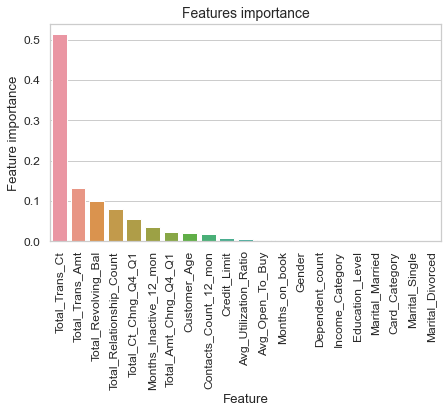

In [89]:
tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': grid_search.best_estimator_.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

# 5. Test

In [90]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

print(classification_report(y_test,final_predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       496
           1       0.98      0.97      0.98      2543

    accuracy                           0.96      3039
   macro avg       0.92      0.94      0.93      3039
weighted avg       0.96      0.96      0.96      3039



In [ ]:
final_model = xgb_grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

print(classification_report(y_test,final_predictions))